In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
stock = pd.read_excel('RELIANCE.NS (5).xlsx')
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-04-03,46.792412,47.656425,45.428555,46.928082,34.837692,149518197.0
1,2000-04-04,46.556770,46.556770,43.179264,43.179264,32.054707,94743234.0
2,2000-04-05,43.329216,44.557400,39.737488,43.164982,32.044098,176360130.0
3,2000-04-06,43.272091,46.621037,43.207825,46.578194,35.390133,113709263.0
4,2000-04-07,47.099457,50.305592,47.099457,50.305592,38.222198,81828761.0
...,...,...,...,...,...,...,...
5990,2024-03-21,2905.050049,2915.800049,2889.350098,2901.949951,2901.949951,6503468.0
5991,2024-03-22,2899.949951,2920.000000,2894.699951,2910.050049,2910.050049,9763804.0
5992,2024-03-26,2890.000000,2904.800049,2878.000000,2883.149902,2883.149902,5707953.0
5993,2024-03-27,2896.000000,3000.000000,2894.000000,2985.699951,2985.699951,8163322.0


In [49]:
stock.drop(['Adj Close','Volume'], axis=1,inplace=True)

In [50]:
stock.head()

,Date,Open,High,Low,Close
0,2000-04-03,46.792412,47.656425,45.428555,46.928082
1,2000-04-04,46.556770,46.556770,43.179264,43.179264
2,2000-04-05,43.329216,44.557400,39.737488,43.164982
3,2000-04-06,43.272091,46.621037,43.207825,46.578194
4,2000-04-07,47.099457,50.305592,47.099457,50.305592


In [51]:
stock.tail()

,Date,Open,High,Low,Close
5990,2024-03-21,2905.050049,2915.800049,2889.350098,2901.949951
5991,2024-03-22,2899.949951,2920.000000,2894.699951,2910.050049
5992,2024-03-26,2890.000000,2904.800049,2878.000000,2883.149902
5993,2024-03-27,2896.000000,3000.000000,2894.000000,2985.699951
5994,2024-03-28,2985.750000,3011.899902,2957.300049,2971.699951


In [52]:
stock.describe()

,Open,High,Low,Close
count,5985.000000,5985.000000,5985.000000,5985.000000
mean,689.167596,697.037309,680.734919,688.597025
std,735.384501,742.437318,727.973424,734.989083
min,29.976276,32.075615,29.076559,29.504995
25%,132.601105,133.815018,131.387207,132.793900
50%,433.347992,438.308258,427.953430,433.233704
75%,853.209595,861.758606,843.929077,851.746643
max,3011.550049,3024.899902,2974.449951,3014.800049


In [53]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5995 entries, 0 to 5994
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5995 non-null   datetime64[ns]
 1   Open    5985 non-null   float64       
 2   High    5985 non-null   float64       
 3   Low     5985 non-null   float64       
 4   Close   5985 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 234.3 KB


In [54]:
stock.corr()

C:\Users\ankit\AppData\Local\Temp\ipykernel_4496\2678749480.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stock.corr()


,Open,High,Low,Close
Open,1.000000,0.999891,0.999885,0.999775
High,0.999891,1.000000,0.999852,0.999910
Low,0.999885,0.999852,1.000000,0.999902
Close,0.999775,0.999910,0.999902,1.000000


In [55]:
stock.shape

(5995, 5)

In [56]:
stock.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5990    False
5991    False
5992    False
5993    False
5994    False
Length: 5995, dtype: bool

In [57]:
stock[stock.duplicated()]

,Date,Open,High,Low,Close


In [58]:
stock.isnull()

,Date,Open,High,Low,Close
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
5990,False,False,False,False,False
5991,False,False,False,False,False
5992,False,False,False,False,False
5993,False,False,False,False,False


In [59]:
stock.isnull().any(axis = 0)

Date     False
Open      True
High      True
Low       True
Close     True
dtype: bool

In [60]:
stock[stock.isnull().any(axis=1)].shape[0]

10

In [61]:
stock.dropna(inplace=True)

C:\Users\ankit\AppData\Local\Temp\ipykernel_4496\2468022386.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = stock.corr()


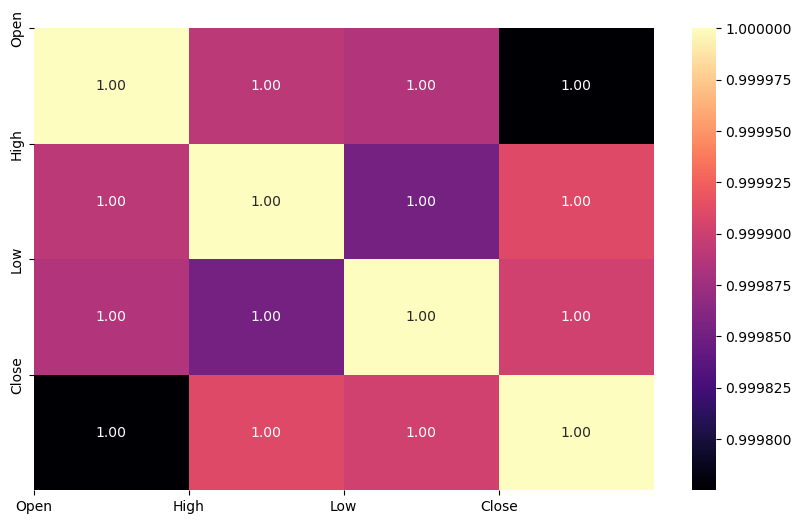

In [47]:
corr = stock.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

<Axes: >

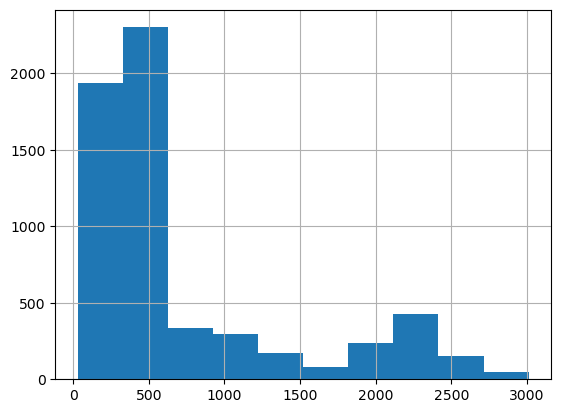

In [41]:
stock['Open'].hist()

<Axes: >

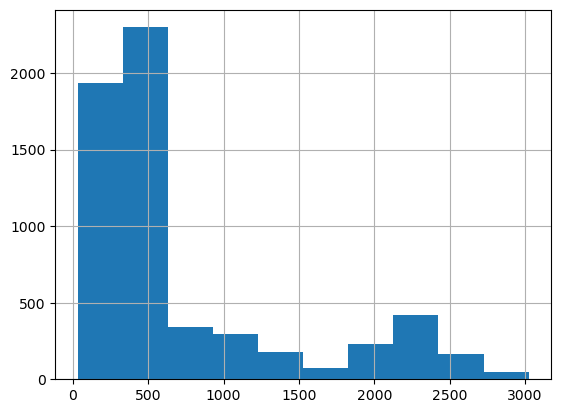

In [42]:
stock['High'].hist()

<Axes: >

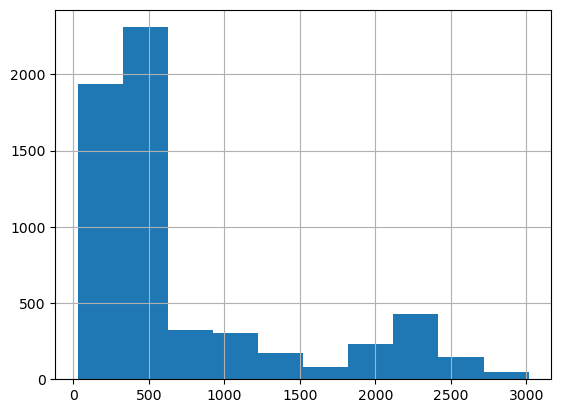

In [43]:
stock['Close'].hist()

In [44]:
#since all the null values where those days where the market was close due to weekend holidays,So removing those rows from the dataset won't make any difference.
stock[stock.isnull().any(axis=1)].shape[0]  


0